In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd#中身みるために入れておく
diabetes = datasets.load_diabetes()
type(diabetes)

sklearn.utils.Bunch

In [2]:
pd.DataFrame(diabetes.data, columns=diabetes.feature_names).head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


糖尿病患者 442 人の検査数値と 1 年後の疾患進行状況（正規化済み）。

In [3]:
dir(diabetes)#objectの中身の関数の確認

['DESCR', 'data', 'feature_names', 'target']

k = 5, alpha = 0.0739


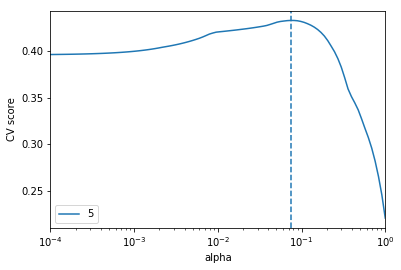

In [6]:
#n=150, cvs=5 default
def GridCVplot(n=150,cvs=5,grid=100):
    X = diabetes.data[:n]
    y = diabetes.target[:n]
    alphas = np.logspace(-4, 0, grid)
    plt.figure()
    clf = GridSearchCV(Lasso(random_state=77, max_iter=1e4),
                       {'alpha': alphas}, cv=cvs, refit=False,
                      iid=False)
    clf.fit(X, y)
    scores = clf.cv_results_['mean_test_score']
    line = plt.semilogx(alphas, scores, label = cvs)
    idx = alphas[np.argmax(scores)]
    plt.axvline(idx, linestyle='--',
                color=line[-1].get_color())
    print('k = %d, alpha = %.4f' % (cvs, idx))
    plt.ylabel('CV score')
    plt.xlabel('alpha')
    plt.xlim([alphas[0], alphas[-1]])
    plt.legend(loc=3)
    return plt.show()
GridCVplot()

k = 4, alpha = 0.0001


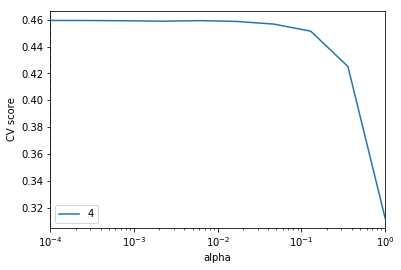

In [8]:
GridCVplot(400,4,10)

k = 8, alpha = 0.0320


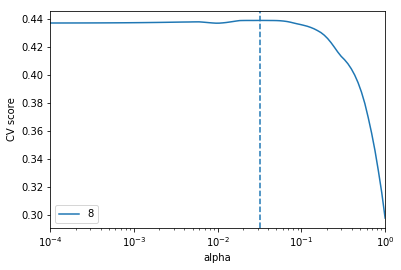

In [10]:
GridCVplot(400,8,100)